문제1

In [2]:
# 패키지 설치

import warnings 
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from pandas import read_excel, melt
from matplotlib import pyplot as plt
from math import sqrt
from scipy.stats import t, ttest_1samp, normaltest, bartlett, levene, ttest_ind, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator


In [3]:
# 그래프 초기화

plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 데이터 불러오기

origin = read_excel('C:/Users/Jihwan/01Class/E.추론통계/수업자료/bread.xlsx')
origin

,무게
0,482
1,479
2,485
3,474
4,479
5,477
6,482
7,480
8,480
9,483


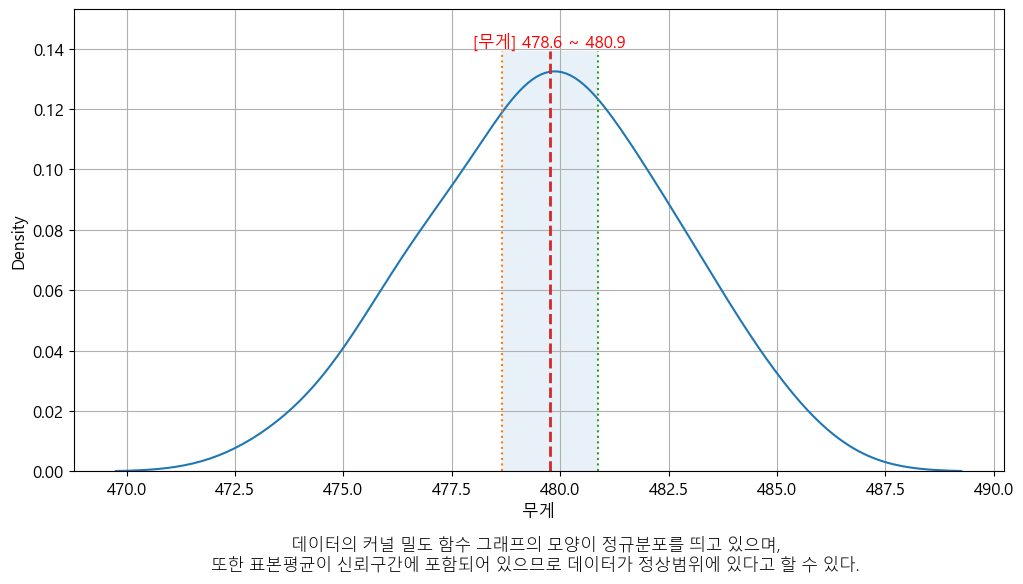

In [5]:
# 신뢰구간 확인

plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """데이터의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며,
또한 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [6]:
# 정규성 검정

for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[무게] statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True


In [7]:
# 단일 표본이므로 등분산성 검토 안함

s, p = ttest_1samp(origin['무게'], 500)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

p-value 값이 0.05보다 크므로 귀무가설을 채택한다. 그러므로 480g은 빵 무게의 평균은 480g과 차이가 없다.

In [8]:
# 500g이 빵 무게 평균보다 작은지 알고자 하는 경우
# 귀무가설: 빵 무게의 평균은 480g보다 작지 않다.
# 대립가설: 빵 무게의 평균은 480g보다 작다.
# 위에서 평균과 비슷하다고 했으므로 귀무가설이 채택되어야 함

s, p = ttest_1samp(origin['무게'], 500,alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

In [9]:
# 500g이 빵 무게 평균보다 큰지 알고자 하는 경우
# 귀무가설: 빵 무게의 평균은 500g보다 크지 않다.
# 대립가설: 빵 무게의 평균은 500g보다 크다.
# 위에서 평균과 비슷하다고 했으므로 귀무가설이 채택되어야 함

s, p = ttest_1samp(origin['무게'], 500,alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -37.524, p-value: 1.000, 귀무가설 채택'

문제2

In [4]:
origin = read_excel('C:/Users/Jihwan/01Class/E.추론통계/수업자료/material.xlsx')
origin

,상표1,상표2
0,80.4,80.1
1,78.2,81.2
2,80.1,79.5
3,77.1,78.0
4,79.6,76.1
5,80.4,77.0
6,81.6,80.1
7,79.9,79.9
8,84.4,78.8
9,80.9,80.8


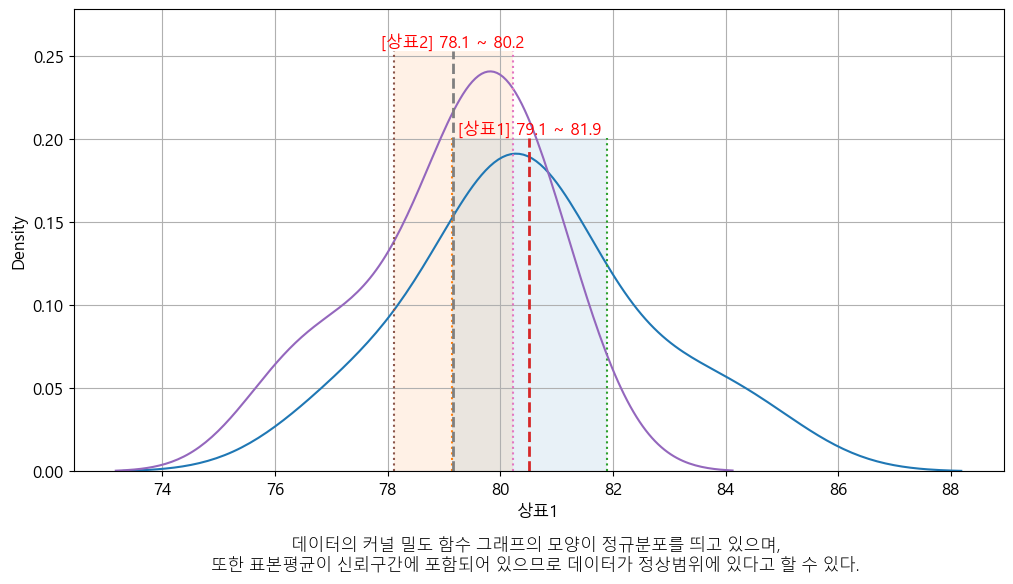

In [5]:
# 신뢰구간 확인

plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """데이터의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며,
또한 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [12]:
# 정규성 검정

for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[상표1] statistic: 0.638, p-value: 0.727, 정규성 충족 여부: True
[상표2] statistic: 1.560, p-value: 0.458, 정규성 충족 여부: True


In [13]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.626, p-value: 0.429, 등분산성 충족 여부: True


In [14]:
#  두 상표간의 주성분 A의 함량 차이가 있는지
# 귀무가설: 두 상표간 A의 함량 차이가 없다.
# 대립가설: 두 상표간 A의 함량 차이가 있다.

s, p = ttest_ind(origin['상표1'], origin['상표2'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 1.744, p-value: 0.096, 귀무가설 채택'

p-value 값이 0.05보다 크므로 귀무가설을 채택한다. 그러므로 두 상표간 A의 함량의 차이가 없다.

In [15]:
# 위에서 함량 차이가 없다고 했으므로 상표1의 A함량이 크다고 세운 대립가설은 기각되어야 한다.

s, p = ttest_ind(origin['상표1'], origin['상표2'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")


'statistic: 1.744, p-value: 0.048, 대립가설 채택'

In [16]:
# 가설검정 시각화

df = melt(origin,var_name='group',value_name='value')
df


,group,value
0,상표1,80.4
1,상표1,78.2
2,상표1,80.1
3,상표1,77.1
4,상표1,79.6
5,상표1,80.4
6,상표1,81.6
7,상표1,79.9
8,상표1,84.4
9,상표1,80.9


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:9.647e-02 t=1.744e+00


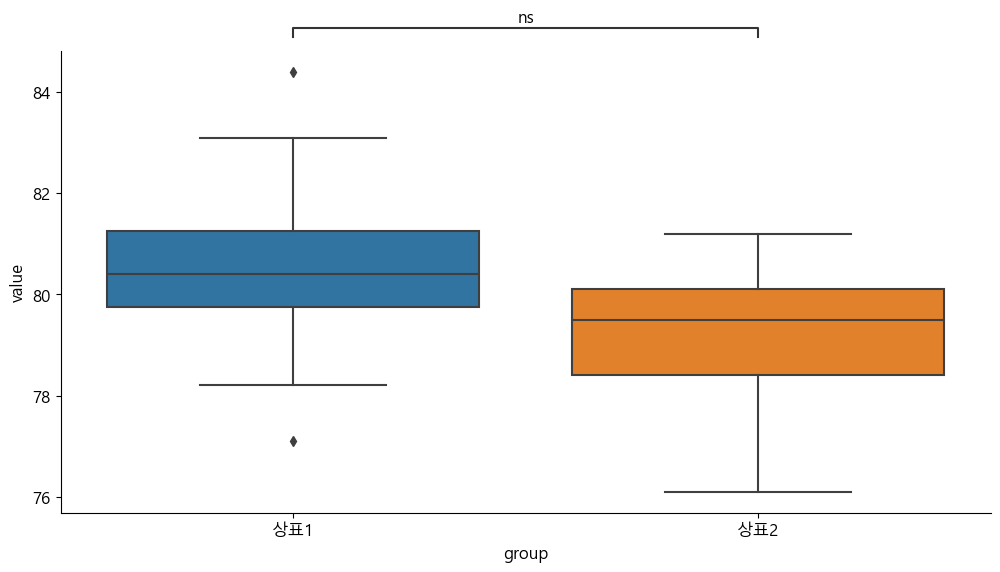

In [18]:
config = {
    "data": df,
    "x": "group",
    "y": "value",
    "pairs": [("상표1", "상표2")],
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

문제3

In [24]:
origin = read_excel('C:/Users/Jihwan/01Class/E.추론통계/수업자료/blood_pressure.xlsx')
origin

,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


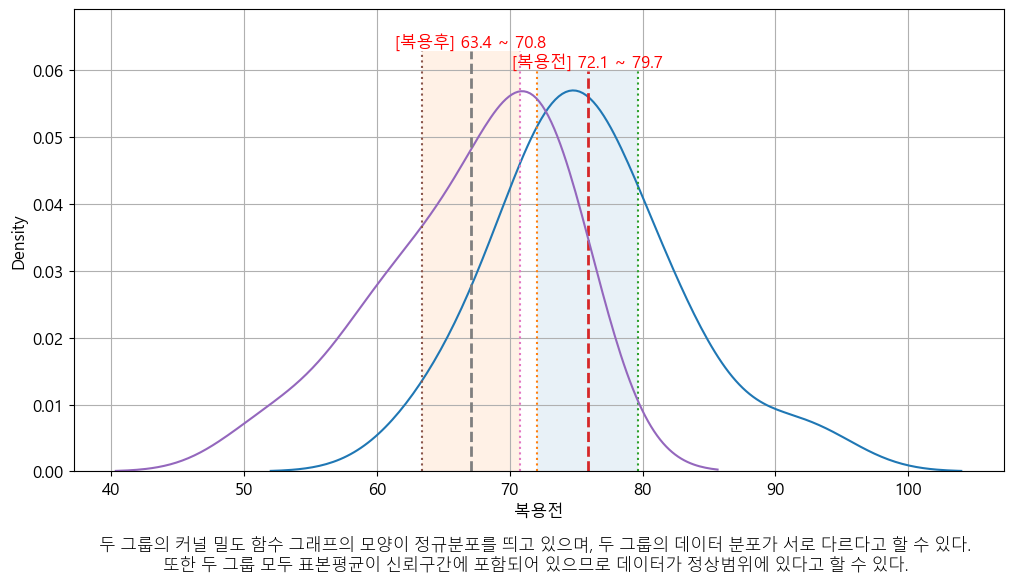

In [25]:
# 신뢰구간 확인

plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()



In [26]:
# 정규성 확인

for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))


[복용전] statistic: 2.591, p-value: 0.274, 정규성 충족 여부: True
[복용후] statistic: 2.656, p-value: 0.265, 정규성 충족 여부: True


In [27]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.011, p-value: 0.916, 등분산성 충족 여부: True


In [28]:
# 정규성, 등분산성 모두 만족하므로 가설검정 시작
# 귀무가설: 피임약 복용 전후 혈압의 차이가 없다.
# 대립가설: 피임약 복용 전후 혈압의 차이가 있다.

s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")



'statistic: 3.105, p-value: 0.008, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `3.105`이고 이에 대응되는 유의확률이 `0.008`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 피임약 복용 전후 혈압의 차이가 있다고 결론 내릴 수 있다.

In [29]:
# 피임약 복용 전이 혈압이 높은지 검정

s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")


'statistic: 3.105, p-value: 0.004, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `3.105`이고 이에 대응되는 유의확률이 `0.004`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 피임약 복용 전 혈압이 높다고 결론 내릴 수 있다.

In [30]:
# 피임약 복용 전이 혈압이 낮은지 검정

s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")


'statistic: 3.105, p-value: 0.996, 귀무가설 채택'

> 차이값에 대한 t 통계량의 값이 `3.105`이고 이에 대응되는 유의확률이 `0.996`이므로 ($p \leq 0.05$)` 대립가설을 기각하고 귀무가설을 채택한다.
>
> 즉, 피임약 복용 전 혈압이 낮지 않다고 결론 내릴 수 있다.

In [31]:
# 가설검정 시각화

df = melt(origin, var_name='group', value_name='value')
df

,group,value
0,복용전,70
1,복용전,80
2,복용전,72
3,복용전,76
4,복용전,76
5,복용전,76
6,복용전,72
7,복용전,78
8,복용전,82
9,복용전,64


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test paired samples, P_val:7.749e-03 t=3.105e+00


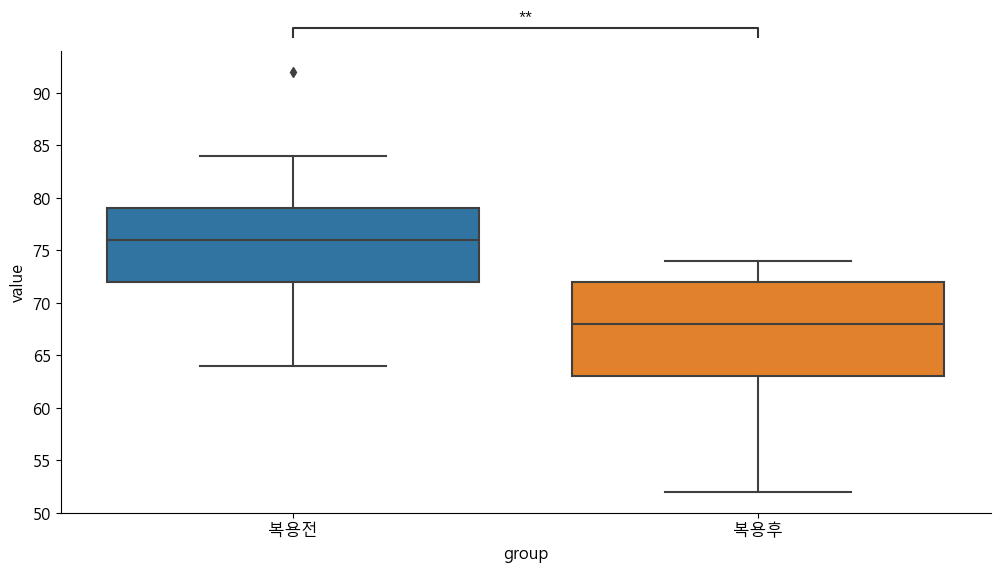

In [32]:
config = {
    "data": df,
    "x": "group",
    "y": "value",
    "pairs": [("복용전", "복용후")],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

문제4

In [33]:
origin = read_excel('C:/Users/Jihwan/01Class/E.추론통계/수업자료/runner_diet.xlsx')
origin

,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


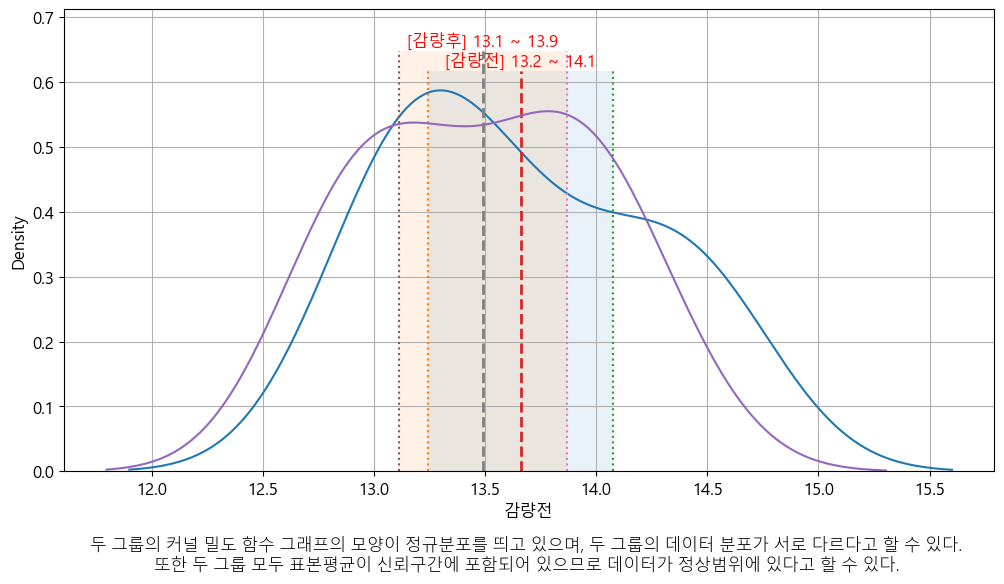

In [34]:
# 신뢰구간 

plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [35]:
# 정규성 검정

for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[감량전] statistic: 2.063, p-value: 0.356, 정규성 충족 여부: True
[감량후] statistic: 1.647, p-value: 0.439, 정규성 충족 여부: True


In [36]:
# 등분산성 검정

normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.073, p-value: 0.787, 등분산성 충족 여부: True


In [ ]:
# 정규성과 등분산성 모두 만족하므로 가설검정 시작
# 귀무가설: 체중감량 후 달리기 속도에 차이가 없다.
# 대립가설: 체중감량 후 달리기 속도에 차이가 있다. 

In [37]:
s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.375, p-value: 0.042, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.375`이고 이에 대응되는 유의확률이 `0.042`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 후 달리기 속도에 차이가 있다고 결론 내릴 수 있다.

In [38]:
# 체중 감량 전이 속도가 빨랐다(낮은 기록)고 대립가설을 세운 경우

s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")


'statistic: 2.375, p-value: 0.979, 귀무가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.375`이고 이에 대응되는 유의확률이 `0.979`이므로 ($p \leq 0.05$)` 대립가설을 기각하고 귀무가설을 채택한다.
>
> 즉, 체중감량 전 달리기 속도가 빠르지 않았다고 결론 내릴 수 있다.

In [39]:
# 체중 감량 전이 속도가 느렸다(높은 기록)고 대립가설을 세운 경우

s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")


'statistic: 2.375, p-value: 0.021, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.375`이고 이에 대응되는 유의확률이 `0.021`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전 달리기 속도가 느렸다고 결론 내릴 수 있다.

문제5

In [43]:
origin = read_excel('C:/Users/Jihwan/01Class/E.추론통계/수업자료/wrestler_diet.xlsx')
origin = origin.set_index('이름')
origin

,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
이름,,,,,,
B.S,43,41,35,41,25,29
P.J,42,41,40,44,25,29
G.G,52,50,36,41,22,23
A.L,53,52,38,42,10,15
I.H,44,40,36,42,15,19
B.Y,46,47,39,44,17,19
I.K,48,47,35,42,24,26
K.B,58,55,34,36,17,18
K.J,50,50,33,35,17,20


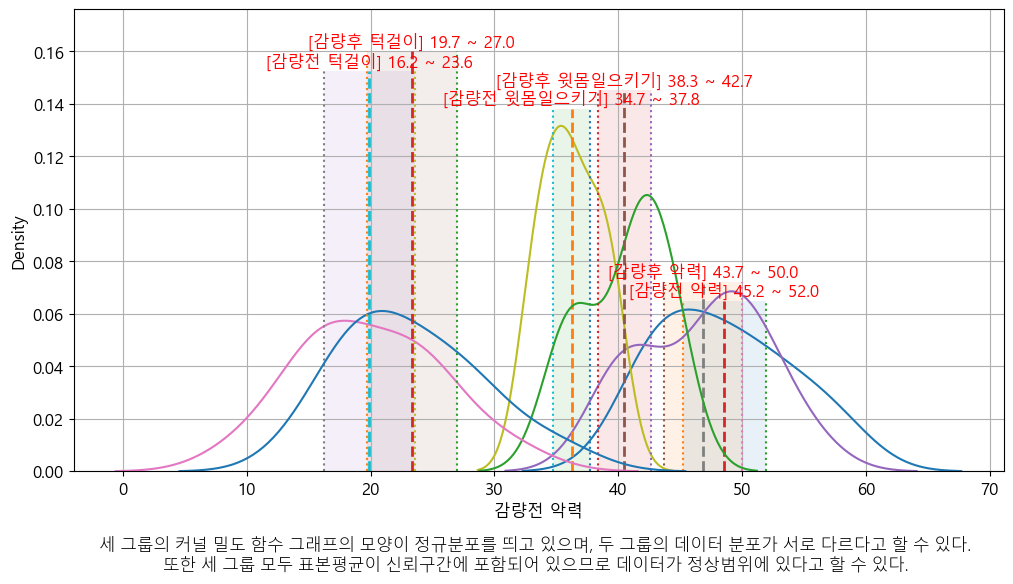

In [45]:
# 신뢰구간

plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """세 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 세 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [46]:
# 정규성 검정

for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))


[감량전 악력] statistic: 1.146, p-value: 0.564, 정규성 충족 여부: True
[감량후 악력] statistic: 1.358, p-value: 0.507, 정규성 충족 여부: True
[감량전 윗몸일으키기] statistic: 1.363, p-value: 0.506, 정규성 충족 여부: True
[감량후 윗몸일으키기] statistic: 2.008, p-value: 0.366, 정규성 충족 여부: True
[감량전 턱걸이] statistic: 0.154, p-value: 0.926, 정규성 충족 여부: True
[감량후 턱걸이] statistic: 1.021, p-value: 0.600, 정규성 충족 여부: True


In [47]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 10.780, p-value: 0.056, 등분산성 충족 여부: True


In [48]:
# 정규성과 등분산성 모두 만족하므로 가설검정 시작
# 귀무가설: 체중감량 전후 악력, 윗몸일으키기, 턱걸이에 차이가 없다.
# 대립가설: 체중감량 전후 악력, 윗몸일으키기, 턱걸이에 차이가 있다.

In [49]:
s, p = ttest_rel(origin['감량전 악력'], origin['감량후 악력'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.365, p-value: 0.037, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.365`이고 이에 대응되는 유의확률이 `0.037`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전후 악력에 차이가 있다고 결론 내릴 수 있다.

In [50]:
# 악력에 대해서 체중감량 전후 차이가 있다고 나왔으므로 감량전 악력이 더 세다고 대립가설 세움

s, p = ttest_rel(origin['감량전 악력'], origin['감량후 악력'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.365, p-value: 0.019, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.365`이고 이에 대응되는 유의확률이 `0.019`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전 악력이 더 세다고 결론 내릴 수 있다.

In [51]:
# 악력에 대해서 체중감량 전후 차이가 있다고 나왔으므로 감량전 악력이 더 약하다고 대립가설 세움

s, p = ttest_rel(origin['감량전 악력'], origin['감량후 악력'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.365, p-value: 0.981, 귀무가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.365`이고 이에 대응되는 유의확률이 `0.981`이므로 ($p \leq 0.05$)` 대립가설을 기각하고 귀무가설을 채택한다.
>
> 즉, 체중감량 전 악력이 더 약하지 않다고 결론 내릴 수 있다.

In [52]:
# 귀무가설: 체중감량 전후 윗몸일으키기에 차이가 없다.
# 대립가설: 체중감량 전후 윗몸일으키기 차이가 있다.

In [53]:
s, p = ttest_rel(origin['감량전 윗몸일으키기'], origin['감량후 윗몸일으키기'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.180, p-value: 0.000, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `-7.180`이고 이에 대응되는 유의확률이 `0.000`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전후 윗몸일으키기에 차이가 있다고 결론 내릴 수 있다.

In [54]:
# 체중감량 전 윗몸일으키기를 더 잘했다는 대립가설 세움
s, p = ttest_rel(origin['감량전 윗몸일으키기'], origin['감량후 윗몸일으키기'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.180, p-value: 1.000, 귀무가설 채택'

> 차이값에 대한 t 통계량의 값이 `-7.180`이고 이에 대응되는 유의확률이 `1.000`이므로 ($p \leq 0.05$)` 대립가설을 기각하고 귀무가설을 채택한다.
>
> 즉, 체중감량 전 윗몸일으키기를 더 잘하지 않았다고 결론 내릴 수 있다.

In [55]:
# 체중감량 전 윗몸일으키기를 더 못했다는 대립가설 세움
s, p = ttest_rel(origin['감량전 윗몸일으키기'], origin['감량후 윗몸일으키기'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.180, p-value: 0.000, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `-7.180`이고 이에 대응되는 유의확률이 `0.000`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전 윗몸일으키기를 더 못했다고 결론 내릴 수 있다.

In [ ]:
# 귀무가설: 체중감량 전후 턱걸이에 차이가 없다.
# 대립가설: 체중감량 전후 턱걸이에 차이가 있다.

In [56]:
s, p = ttest_rel(origin['감량전 턱걸이'], origin['감량후 턱걸이'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -6.842, p-value: 0.000, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `-6.842`이고 이에 대응되는 유의확률이 `0.000`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전후 턱걸이에 차이가 있다고 결론 내릴 수 있다.

In [57]:
# 감량 전 턱걸이를 더 잘했다는 대립가설 세움
s, p = ttest_rel(origin['감량전 턱걸이'], origin['감량후 턱걸이'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -6.842, p-value: 1.000, 귀무가설 채택'

> 차이값에 대한 t 통계량의 값이 `-6.842`이고 이에 대응되는 유의확률이 `1.000`이므로 ($p \leq 0.05$)` 대립가설을 기각하고 귀무가설을 채택한다.
>
> 즉, 체중감량 전 턱걸이를 잘하지 않았다고 결론 내릴 수 있다.

In [58]:
# 감량 전 턱걸이를 더 못했다는 대립가설 세움
s, p = ttest_rel(origin['감량전 턱걸이'], origin['감량후 턱걸이'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -6.842, p-value: 0.000, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `-6.842`이고 이에 대응되는 유의확률이 `0.000`이므로 ($p \leq 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량 전 턱걸이를 못했다고 결론 내릴 수 있다.

In [59]:
# 가설검정 시각화

df = melt(origin, var_name='group', value_name='value')
df

,group,value
0,감량전 악력,43
1,감량전 악력,42
2,감량전 악력,52
3,감량전 악력,53
4,감량전 악력,44
...,...,...
67,감량후 턱걸이,18
68,감량후 턱걸이,20
69,감량후 턱걸이,25
70,감량후 턱걸이,35


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 악력 vs. 감량후 악력: t-test paired samples, P_val:3.745e-02 t=2.365e+00
감량전 윗몸일으키기 vs. 감량후 윗몸일으키기: t-test paired samples, P_val:1.798e-05 t=-7.180e+00
감량전 턱걸이 vs. 감량후 턱걸이: t-test paired samples, P_val:2.794e-05 t=-6.842e+00


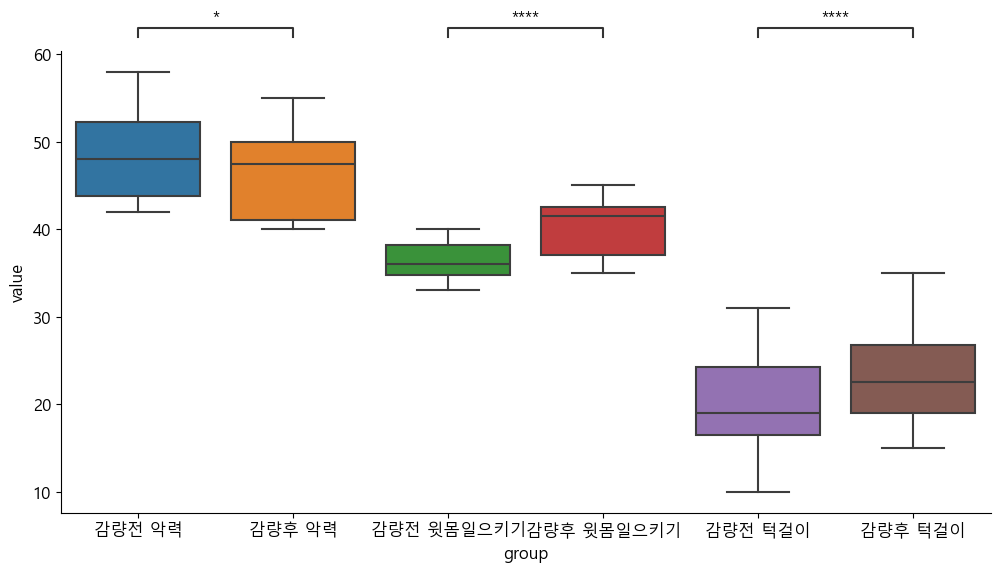

In [64]:
config = {
    "data": df,
    "x": "group",
    "y": "value",
    "pairs": [("감량전 악력", "감량후 악력"),('감량전 윗몸일으키기','감량후 윗몸일으키기'),('감량전 턱걸이','감량후 턱걸이')],
    "test": 't-test_paired',
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()


sb.despine()

# fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# for i, v in enumerate(ax):
#     #config['test'] = test[i]

#     k = sb.boxplot(ax=v, data=config['data'], x=config['x'], y=config['y'])
#     v.get_xaxis().axis_name

#     annotator = Annotator(k, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
#     annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
#     annotator.apply_and_annotate()

#     sb.despine(ax=v)

plt.show()
plt.close()